#  Global Trust Rate: Descriptive Statistics and Visual Exploration 


This is the link to my Github: https://github.com/charlottehealy/Everything-counts-assignment1

## Introduction <br>
For this assignmnet I am choosing to look at a dataset on 'trust' as I am interested in the role that different sectors play in supporting better outcomes for people and communities. Over the last few years there have been many reports on loss of trust in governments, businesses and more recently with the Covid pandemic, scientists. We also hear news outlets report frequently on a loss of trust and increased polarisation in communities. I am exploring this datast to look at the statistics on trust. 

For this assignment I will be focusing on describing the dataset and drawing out key comparisons that start to tell a story on how much people trust different institutions across different countries. 

## About the dataset <br>
The Wellcome Global Monitor is the world’s largest study into how people around the world think and feel about science and major health challenges. It surveys over 140,000 people from more than 140 countries.
Survey respondents were asked, "How much do you trust each of the following: other people in your neighborhood; your national government; scientists; journalists; doctors and nurses; people who work at non-governmental or non-profit organisations; healers? Do you trust them a lot, some, not much, or not at all?"

Respondants could answer: 1 : A lot 2 : Some 3 : Not much 4 : None at all 99 : Refused to answer / NULL
This dataset shows the % rate of respondent who answered "A lot" or "Some" for each country Note: NULL values are excluded. The full survey responses are downloadable and in future exploration I will likely explore these. However, for the purposes of drawing out basic insight from the data I am choosing to work with the main dataset which pulls out the averages for each catagory for each country.  

I have modified the original dataset slighty by adding a final column to show the average trust score across the seven categories for each country. I also added a final row to show the average trust scores for each category (variable) this meant I had to check for missing data (there were a few unknowns in the government column) and create the average accordingly.  

## Descriptive Statistics and Visual Exploration

In [39]:
import pandas as pd
#load data
data_file = 'Global_trust-rate_edit2 .csv' #name of the dataset 
data = pd.read_csv(data_file)
#limit to 2 dp
pd.set_option("display.precision", 2)
#View data 
data

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor_ Nurses,Philantropist,Traditional_Healers,Country_Trust_Score
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43,51.87
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09,69.23
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94,62.77
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33,82.08
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15,81.94
...,...,...,...,...,...,...,...,...,...
109,Venezuela,61.17,29.60,66.70,53.85,77.46,59.52,27.05,53.62
110,Vietnam,77.74,NaN,76.91,60.07,88.43,79.31,79.53,66.00
111,Zambia,45.30,47.73,51.23,59.81,72.71,62.07,14.17,50.43
112,Zimbabwe,64.96,67.77,73.22,65.99,81.51,83.90,31.66,67.00


The dataset is made up of 113 countries and eight further variables (seven institutions/categories) and the average score for the country. 

In [40]:
#Listing the variable names
data.columns.values

array(['Country', 'Neighbourhood', 'Government', 'Scientist',
       'Journalist', 'Doctor_ Nurses', 'Philantropist',
       'Traditional_Healers', 'Country_Trust_Score'], dtype=object)

In [41]:
#describing the data for the final column 'Country_Trust_Score' to show the mean, standard deviation, and quartiles, but removing the final row (as that is an average). 
data.iloc[:-1]['Country_Trust_Score'].describe()


count    113.00
mean      66.49
std       12.05
min       36.73
25%       57.87
50%       68.63
75%       74.39
max       89.43
Name: Country_Trust_Score, dtype: float64

This decription shows across all countries surveyed there is an average of 66% trust in the seven categories included in the dataset. 

In [42]:
#The interquartile range can be calculated by taking the difference between 25% and 75% quartile 
74.39-57.87


16.520000000000003

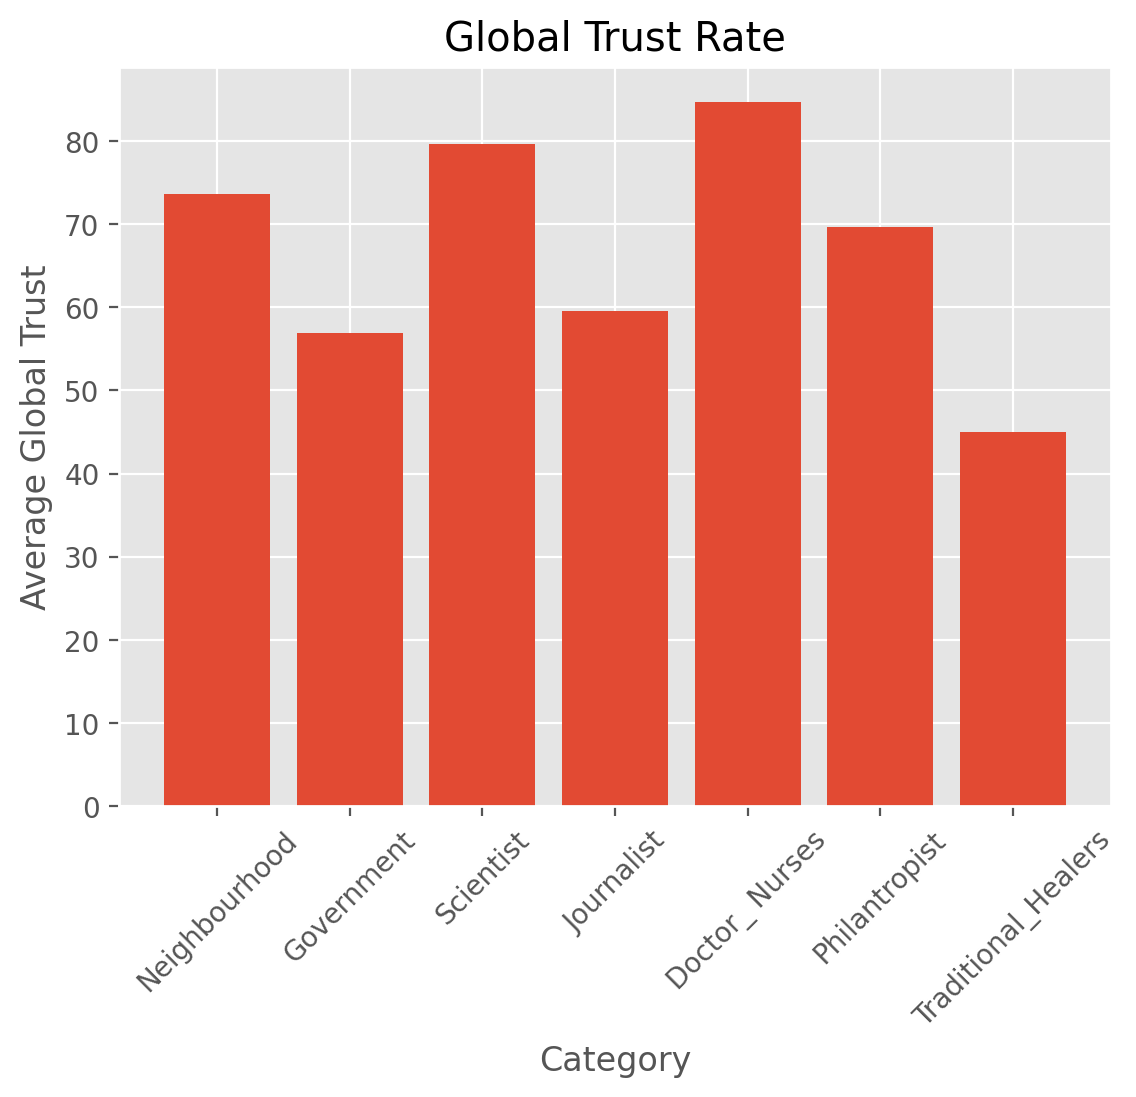

In [43]:
import matplotlib.pyplot as plt #imports the python graph tool 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 
cols = ['Neighbourhood', 'Government', 'Scientist','Journalist', 'Doctor_ Nurses', 'Philantropist','Traditional_Healers']   #adding all the columns I am interested in (so excluding the total and the country names) 
row = 113                                                   # this is the row of values I want so the average 

plt.bar(cols, data.loc[row, cols])
plt.xlabel("Category")
plt.ylabel("Average Global Trust")
plt.title(f"Global Trust Rate")
plt.xticks(rotation=45) #this makes the labels easier to view! 
plt.show()

This histogram makes it easy to see that overall the lowest trust rate is in Traditional Healers, followed by Government, Journalists and then Philanthropists, Neighbours, Scientists and highest of all Doctors and Nurses when an average across all countries is taken. 

In [44]:
data.nlargest(5, 'Country_Trust_Score')
#to identify the top 5 overall highest trusting countries 

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor_ Nurses,Philantropist,Traditional_Healers,Country_Trust_Score
56,Laos,81.98,94.93,89.37,89.40,96.58,88.57,85.17,89.43
77,Norway,96.13,96.27,98.17,87.92,99.40,91.86,45.59,87.91
73,New Zealand,93.92,86.58,96.05,76.62,96.87,94.02,57.98,86.01
95,Switzerland,86.47,93.89,94.56,83.17,97.50,80.61,61.26,85.35
25,Denmark,95.20,84.56,97.87,73.64,98.00,88.74,59.38,85.34


In [45]:
data.nsmallest(5, 'Country_Trust_Score')
#to identify the bottom 5 lowest trusting countries 

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor_ Nurses,Philantropist,Traditional_Healers,Country_Trust_Score
15,Cameroon,33.71,30.28,38.97,41.94,45.99,38.26,27.93,36.73
34,Gabon,28.19,34.57,41.52,31.13,53.78,40.93,30.37,37.21
49,Ivory Coast,31.17,40.57,50.42,31.24,54.34,38.38,41.68,41.11
75,Nigeria,42.47,21.11,47.41,37.00,64.21,44.08,35.11,41.63
8,Benin,22.99,61.12,43.36,41.64,59.29,42.43,33.44,43.47


In [46]:
data.corr(numeric_only=True)

,Neighbourhood,Government,Scientist,Journalist,Doctor_ Nurses,Philantropist,Traditional_Healers,Country_Trust_Score
Neighbourhood,1.00,0.46,0.87,0.52,0.81,0.76,0.32,0.85
Government,0.46,1.00,0.46,0.67,0.57,0.57,0.31,0.76
Scientist,0.87,0.46,1.00,0.44,0.88,0.69,0.29,0.82
Journalist,0.52,0.67,0.44,1.00,0.54,0.67,0.31,0.76
Doctor_ Nurses,0.81,0.57,0.88,0.54,1.00,0.73,0.32,0.87
Philantropist,0.76,0.57,0.69,0.67,0.73,1.00,0.24,0.83
Traditional_Healers,0.32,0.31,0.29,0.31,0.32,0.24,1.00,0.51
Country_Trust_Score,0.85,0.76,0.82,0.76,0.87,0.83,0.51,1.00


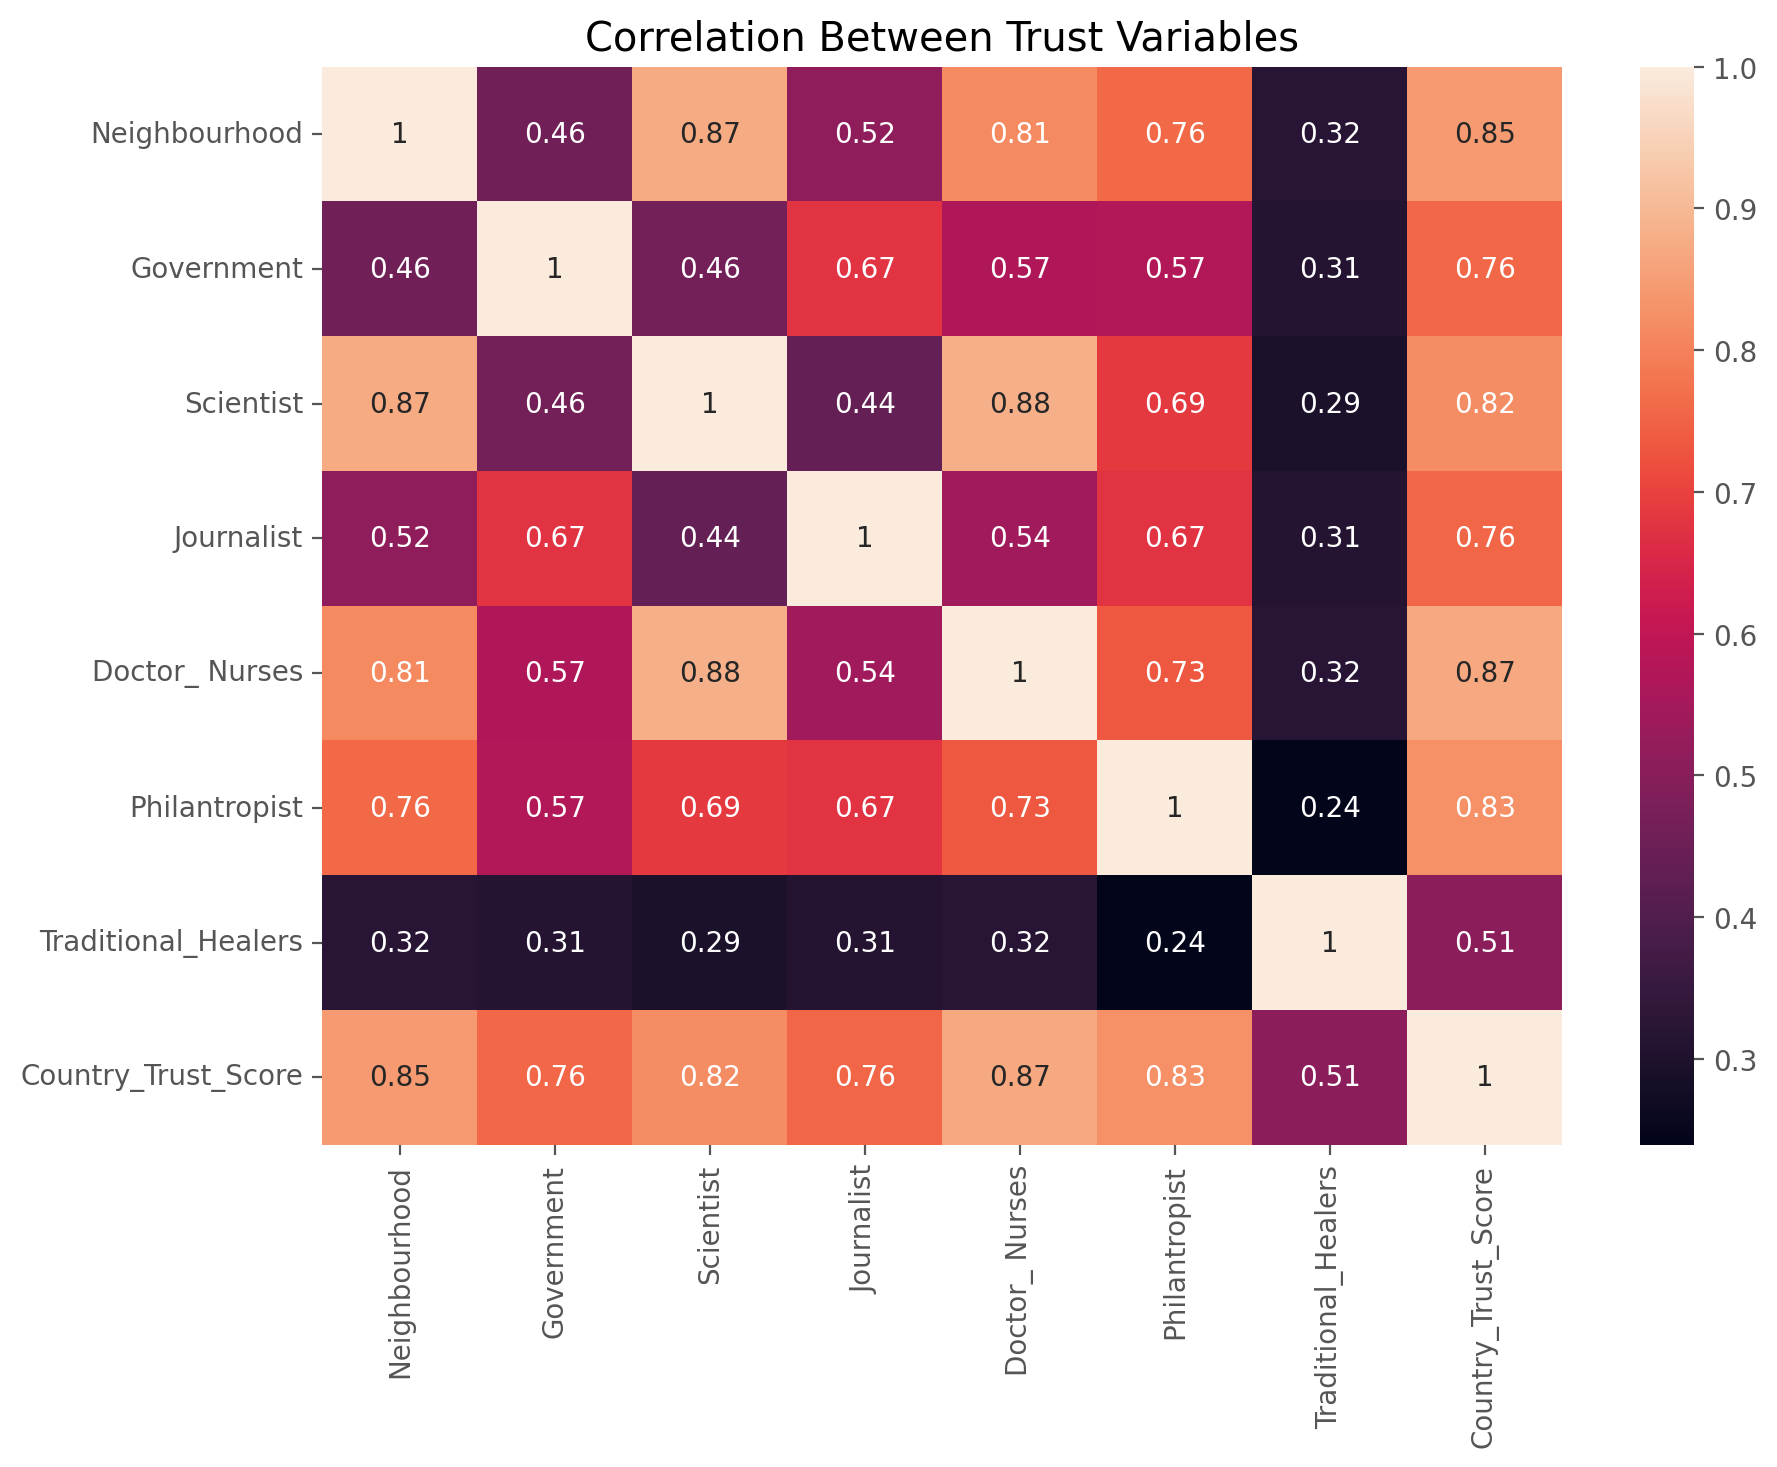

In [47]:
import seaborn as sns #importing data visualisation library

plt.figure(figsize=(10,7)) #creates the plot 
sns.heatmap(data.corr(numeric_only=True), annot=True) #works out correlation matrix 
plt.title("Correlation Between Trust Variables")
plt.show()
#showing how each variable correlates with the other 

This matrix shows the correlation coefficient between the different categories. +1 = perfect positive relationship, -1 = perfect negative relationship, 0 = no linear relationship. There is a postive relationship between all categories but the matrix shows that trust in Doctors and nurses is highly correlated with trust in scientists. 

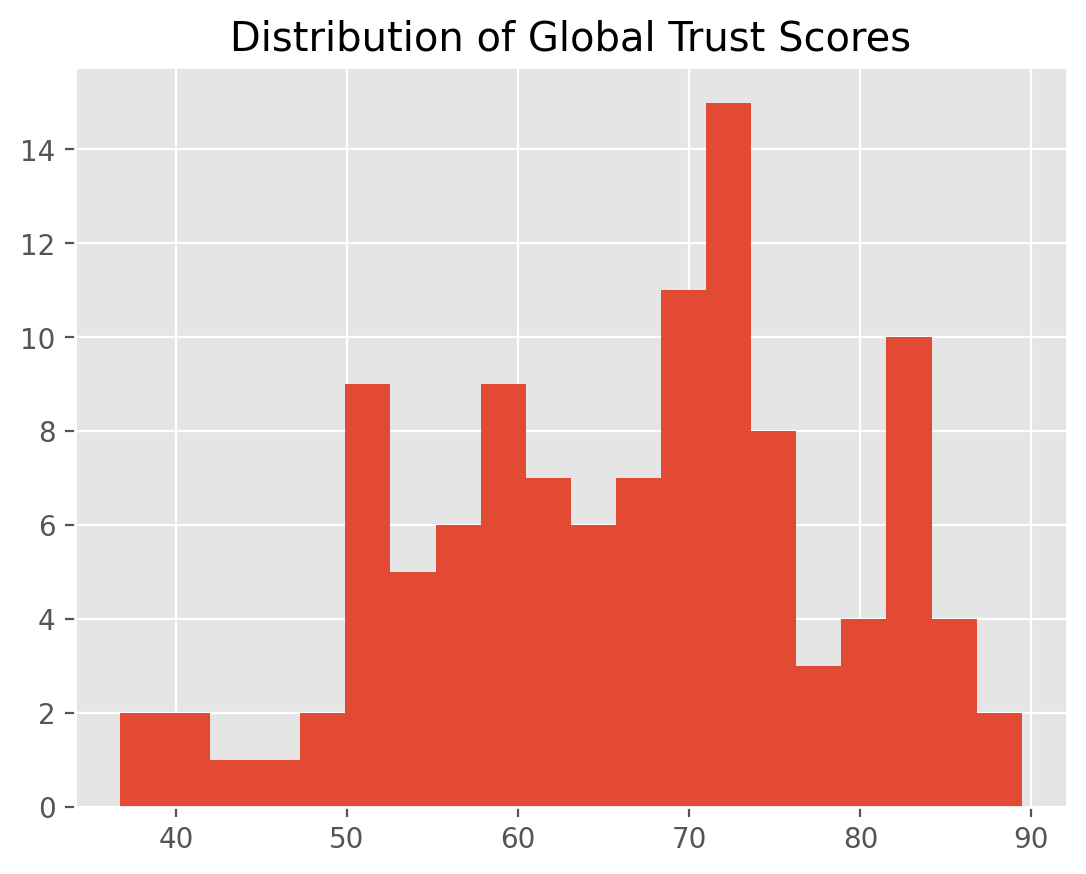

In [48]:
data['Country_Trust_Score'].hist(bins=20) # creating a histogram showing the distribution of countries Trust Scores  
plt.title("Distribution of Global Trust Scores")
plt.show()

This graph does not show a completely normal distribution. It is multimodal with several peaks. There is a left skew with less scores on the lower end of the scale. 

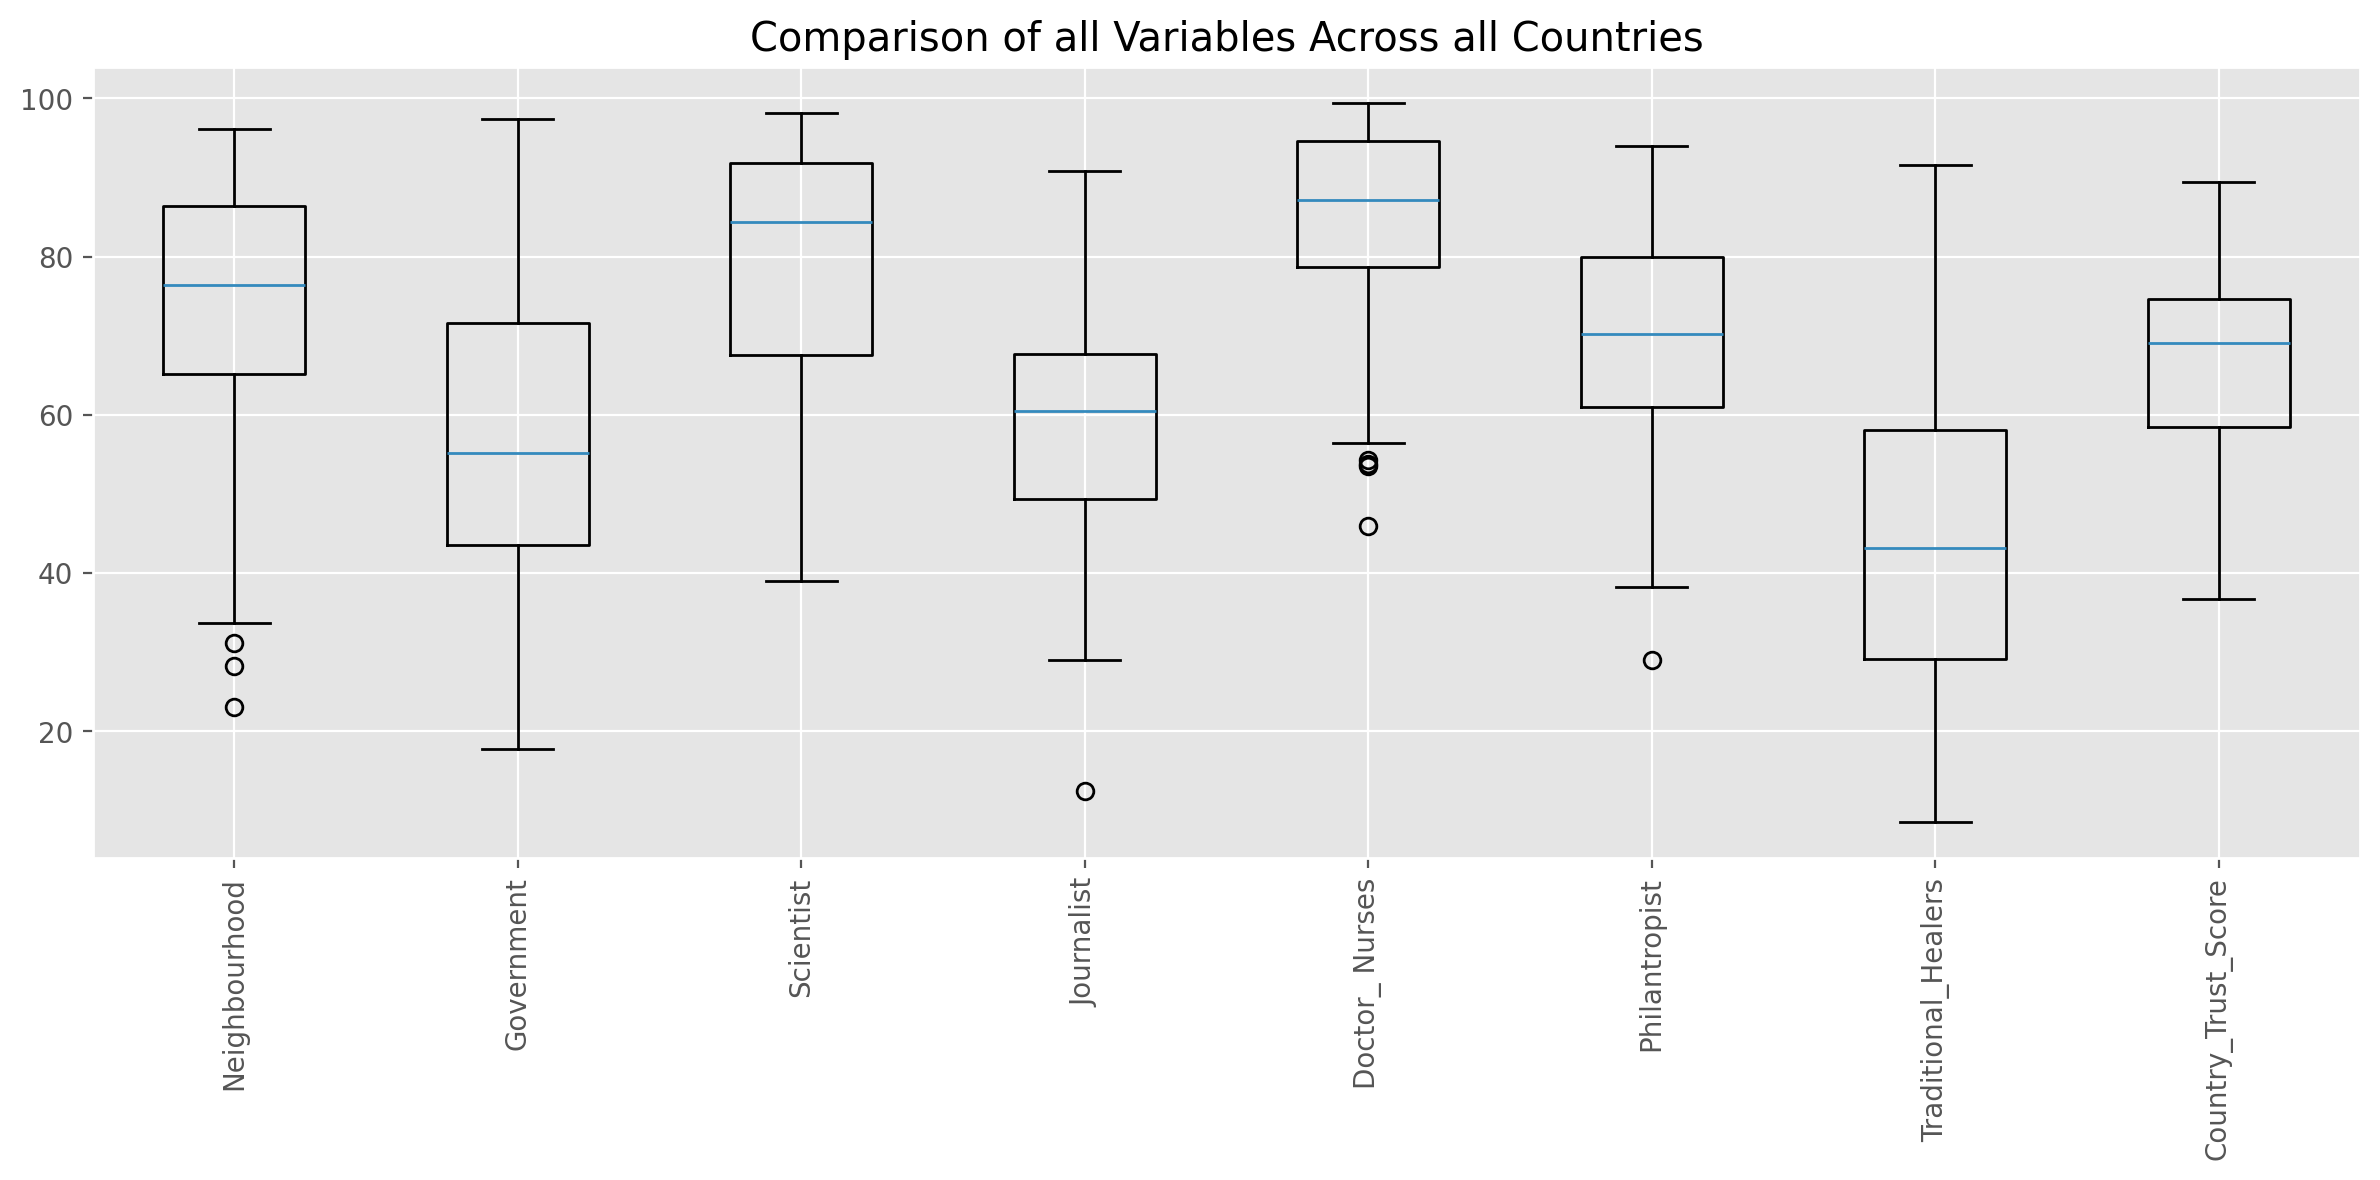

In [49]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include='number')

# Create one combined boxplot
plt.figure(figsize=(12,6))
plt.boxplot(numeric_cols.dropna().values, tick_labels=numeric_cols.columns)
plt.xticks(rotation=90)
plt.title("Comparison of all Variables Across all Countries")
plt.tight_layout()
plt.show()

The boxplots reveal some interesting insights - there is more variation in responses (a wide IQR) for traditional healers than any other category, followed by Government. Doctors and nurses as well as scientis have a relatively narrow IQR, suggesting consistent trust across countries. 

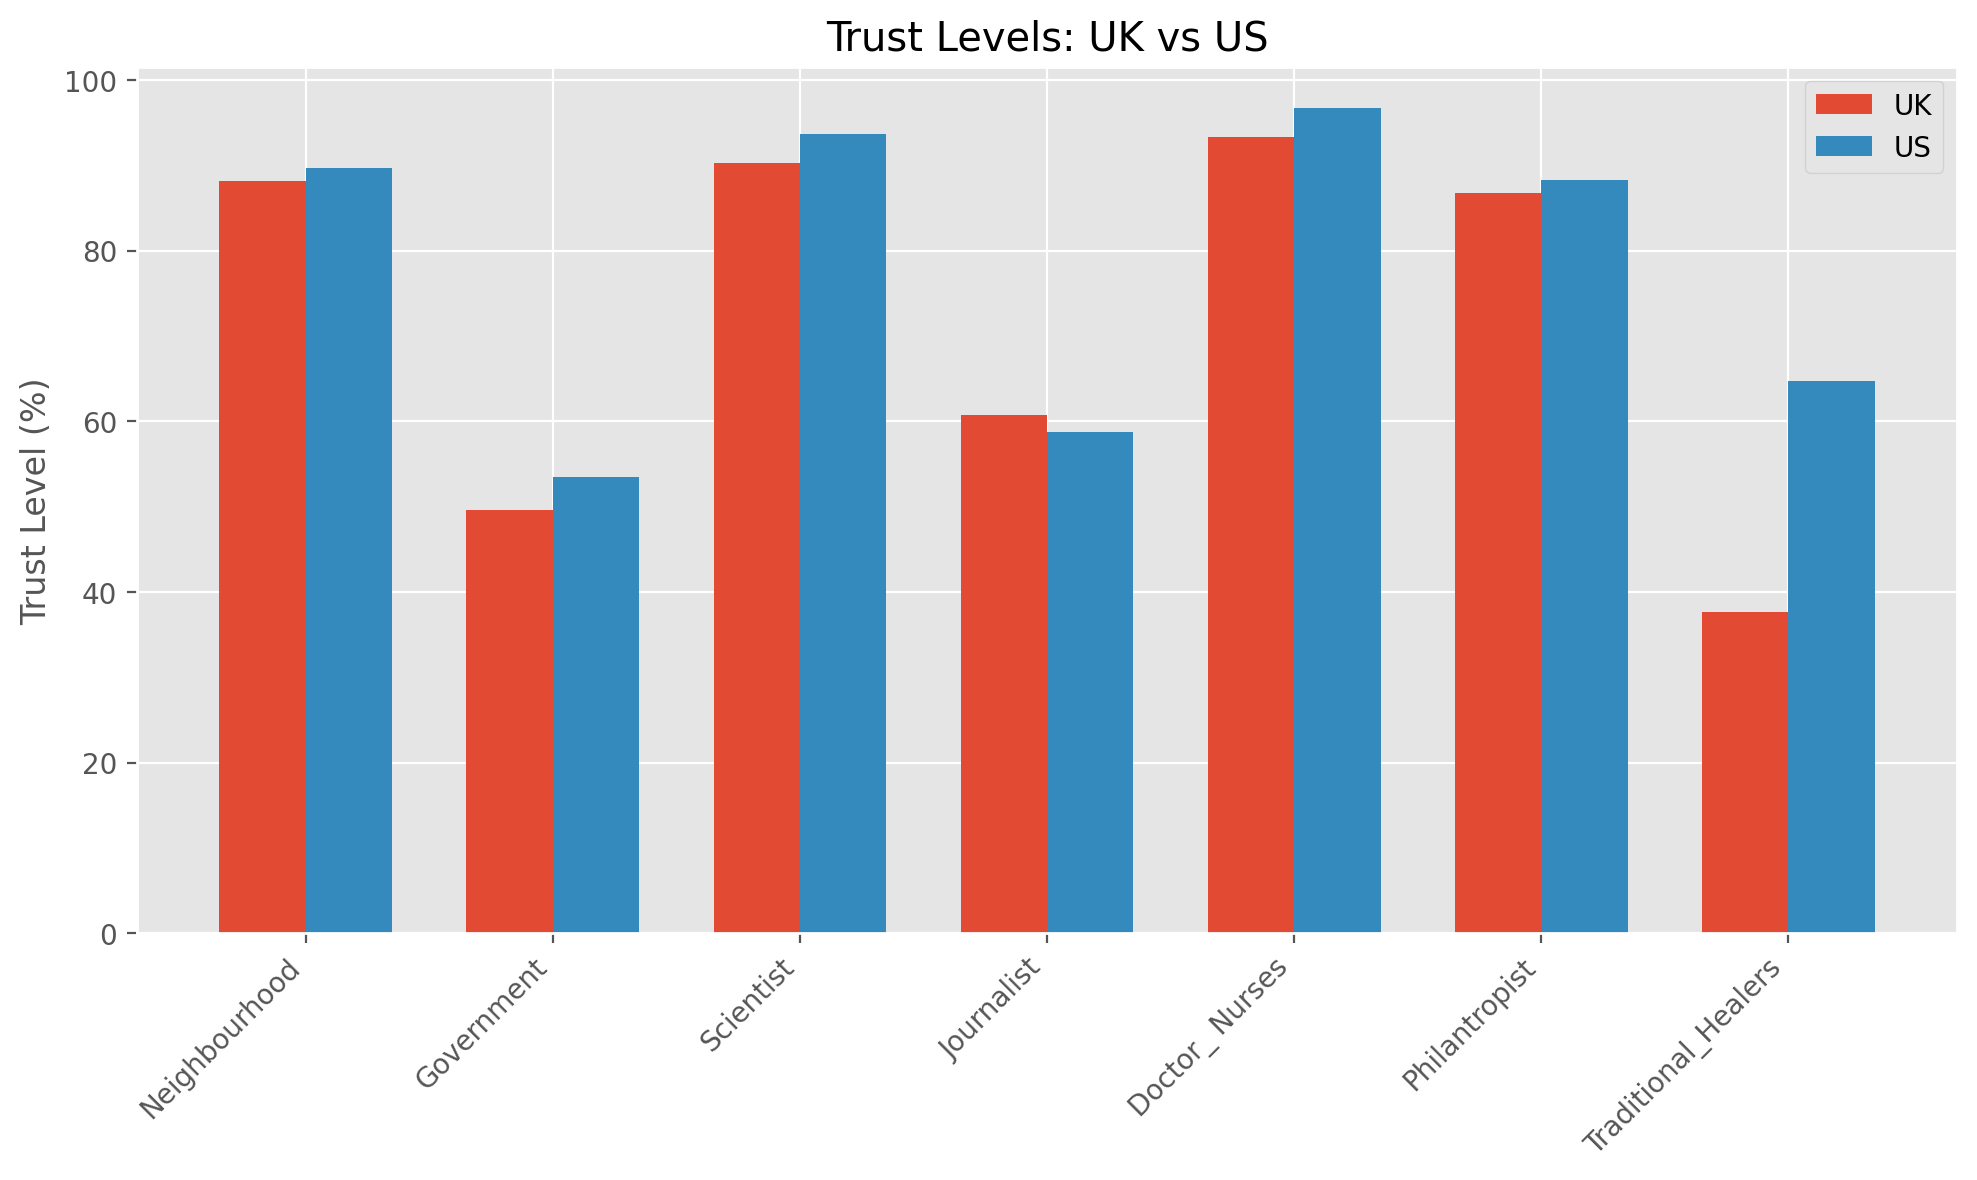

In [50]:
import numpy as np      # <- import NumPy
uk_row = data.iloc[105] #calling Uk data
us_row = data.iloc[106] #calling US data 

trust_columns = ['Neighbourhood', 'Government', 'Scientist', 'Journalist', 'Doctor_ Nurses', 'Philantropist', 'Traditional_Healers'] #columns to compare 

uk_scores = uk_row[trust_columns].values
us_scores = us_row[trust_columns].values


x = np.arange(len(trust_columns)) # X positions
width = 0.35  # width of the bars

#details to plot the graph 
plt.figure(figsize=(10,6))

plt.bar(x - width/2, uk_scores, width, label='UK')
plt.bar(x + width/2, us_scores, width, label='US')

plt.xticks(x, trust_columns, rotation=45, ha='right')
plt.ylabel("Trust Level (%)")
plt.title("Trust Levels: UK vs US")
plt.legend()
plt.tight_layout()
plt.show()

This bar chart shows a direct comparison between trust levels for different institutions across the UK and the US. There is a large amount of similarities between the two countries with most categories showing very similar trust levels (within a few percentage points). The starkest variation is the level of trust in traditional healers, which is much lower for the UK (38%) than the US (65%). 

Throughout this assignment I have begun to draw insights from a very interesting dataset on trust across different institutions and countries. I have looked at averages, comparisons and key correlations to begin a story on how trust varies by place. In further work I would like to explore clusters and outliers to draw out more insight on trust across nations.  